# Rede #3 Co-ocorrência por Empresa ou Classe Terapêutica

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## Importação do arquivo e tratamento dos dados

In [20]:
# Ler o dataset dados.csv
df = pd.read_csv('dados.csv', encoding='latin1', delimiter=';')
df.shape
df.head()

,TIPO_PRODUTO,NOME_PRODUTO,DATA_FINALIZACAO_PROCESSO,CATEGORIA_REGULATORIA,NUMERO_REGISTRO_PRODUTO,DATA_VENCIMENTO_REGISTRO,NUMERO_PROCESSO,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,MEDICAMENTO,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166.0,01/04/2005,250000254169821,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,MEDICAMENTO,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001.0,01/05/2005,2501017185899,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,MEDICAMENTO,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305.0,01/05/2006,253510228050056,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN
3,MEDICAMENTO,ARNICA MONTANA,19/03/2002,FITOTERÁPICO,104730021.0,01/03/2007,2502500782199,FITOTERAPICO SIMPLES,92762277000170 - VIDORA FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
4,MEDICAMENTO,ARNICA MONTANA L.,01/07/2002,FITOTERÁPICO,131750004.0,01/06/2007,253510326310184,FITOTERAPICO SIMPLES,00925697000101 - LIMED LABORATORIO INDUSTRIAL ...,CADUCO/CANCELADO,NaN


In [21]:
df = df.dropna()
df.head()
df.shape

(10768, 11)

In [22]:
df = df.drop(columns=['TIPO_PRODUTO', 'DATA_FINALIZACAO_PROCESSO', 'NUMERO_REGISTRO_PRODUTO', 'DATA_VENCIMENTO_REGISTRO', 'NUMERO_PROCESSO'])
df.head()

,NOME_PRODUTO,CATEGORIA_REGULATORIA,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
38,A SAÚDE DA MULHER,NOVO,ANTIESPASMODICOS E ANTICOLINERGICOS-ASSOC MED...,57507378000365 - EMS S/A,VÁLIDO,EXTRATO FLUIDO DE CASCA DE LARANJA AMARGA + E...
42,AAS,SIMILAR,ANALGESICOS NAO NARCOTICOS,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,ACIDO ACETILSALICILICO
45,AAS PROTECT,SIMILAR,ANTIAGREGANTE PLAQUETARIO,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,ÁCIDO ACETILSALICÍLICO
47,ABBA,SIMILAR,AGENTES ANTINEOPLÁSICOS,05035244000123 - SUN FARMACÊUTICA DO BRASIL LTDA,VÁLIDO,ACETATO DE ABIRATERONA
50,ABC,SIMILAR,ANTIMICOTICOS PARA USO TOPICO,92695691000103 - KLEY HERTZ FARMACEUTICA S.A,VÁLIDO,CLOTRIMAZOL


In [23]:
# Transformar a coluna PRINCIPIO_ATIVO em uma lista de princípios ativos
df['PRINCIPIO_ATIVO'] = df['PRINCIPIO_ATIVO'].apply(lambda x: [principio.strip() for principio in x.split('+')])

# Exibir as primeiras linhas do dataframe para verificar as mudanças
df.head()

,NOME_PRODUTO,CATEGORIA_REGULATORIA,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
38,A SAÚDE DA MULHER,NOVO,ANTIESPASMODICOS E ANTICOLINERGICOS-ASSOC MED...,57507378000365 - EMS S/A,VÁLIDO,"[EXTRATO FLUIDO DE CASCA DE LARANJA AMARGA, EX..."
42,AAS,SIMILAR,ANALGESICOS NAO NARCOTICOS,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,[ACIDO ACETILSALICILICO]
45,AAS PROTECT,SIMILAR,ANTIAGREGANTE PLAQUETARIO,10588595001092 - SANOFI MEDLEY FARMACÊUTICA LTDA.,VÁLIDO,[ÁCIDO ACETILSALICÍLICO]
47,ABBA,SIMILAR,AGENTES ANTINEOPLÁSICOS,05035244000123 - SUN FARMACÊUTICA DO BRASIL LTDA,VÁLIDO,[ACETATO DE ABIRATERONA]
50,ABC,SIMILAR,ANTIMICOTICOS PARA USO TOPICO,92695691000103 - KLEY HERTZ FARMACEUTICA S.A,VÁLIDO,[CLOTRIMAZOL]


## Construção da rede

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supondo que df já está definido e contém as colunas 'NOME_PRODUTO' e 'PRINCIPIO_ATIVO'

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós ao grafo
for produto in df['NOME_PRODUTO']:
    G.add_node(produto)

# Criar um dicionário para mapear princípios ativos aos produtos
principio_para_produtos = {}

for index, row in df.iterrows():
    produto = row['NOME_PRODUTO']
    principios_ativos = row['PRINCIPIO_ATIVO']
    for principio in principios_ativos:
        if principio not in principio_para_produtos:
            principio_para_produtos[principio] = set()
        principio_para_produtos[principio].add(produto)

# Adicionar arestas ao grafo com base no dicionário
for produtos in principio_para_produtos.values():
    produtos = list(produtos)
    for i in range(len(produtos)):
        for j in range(i + 1, len(produtos)):
            G.add_edge(produtos[i], produtos[j])

# Exibir o número de nós e arestas no grafo
print(f"Número de nós: {G.number_of_nodes()}")
print(f"Número de arestas: {G.number_of_edges()}")

Número de nós: 7453
Número de arestas: 91958


## Plot do grafo

/home/lucas/Projects/datastructure/U1T3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lucas/Projects/datastructure/U1T3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lucas/Projects/datastructure/U1T3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


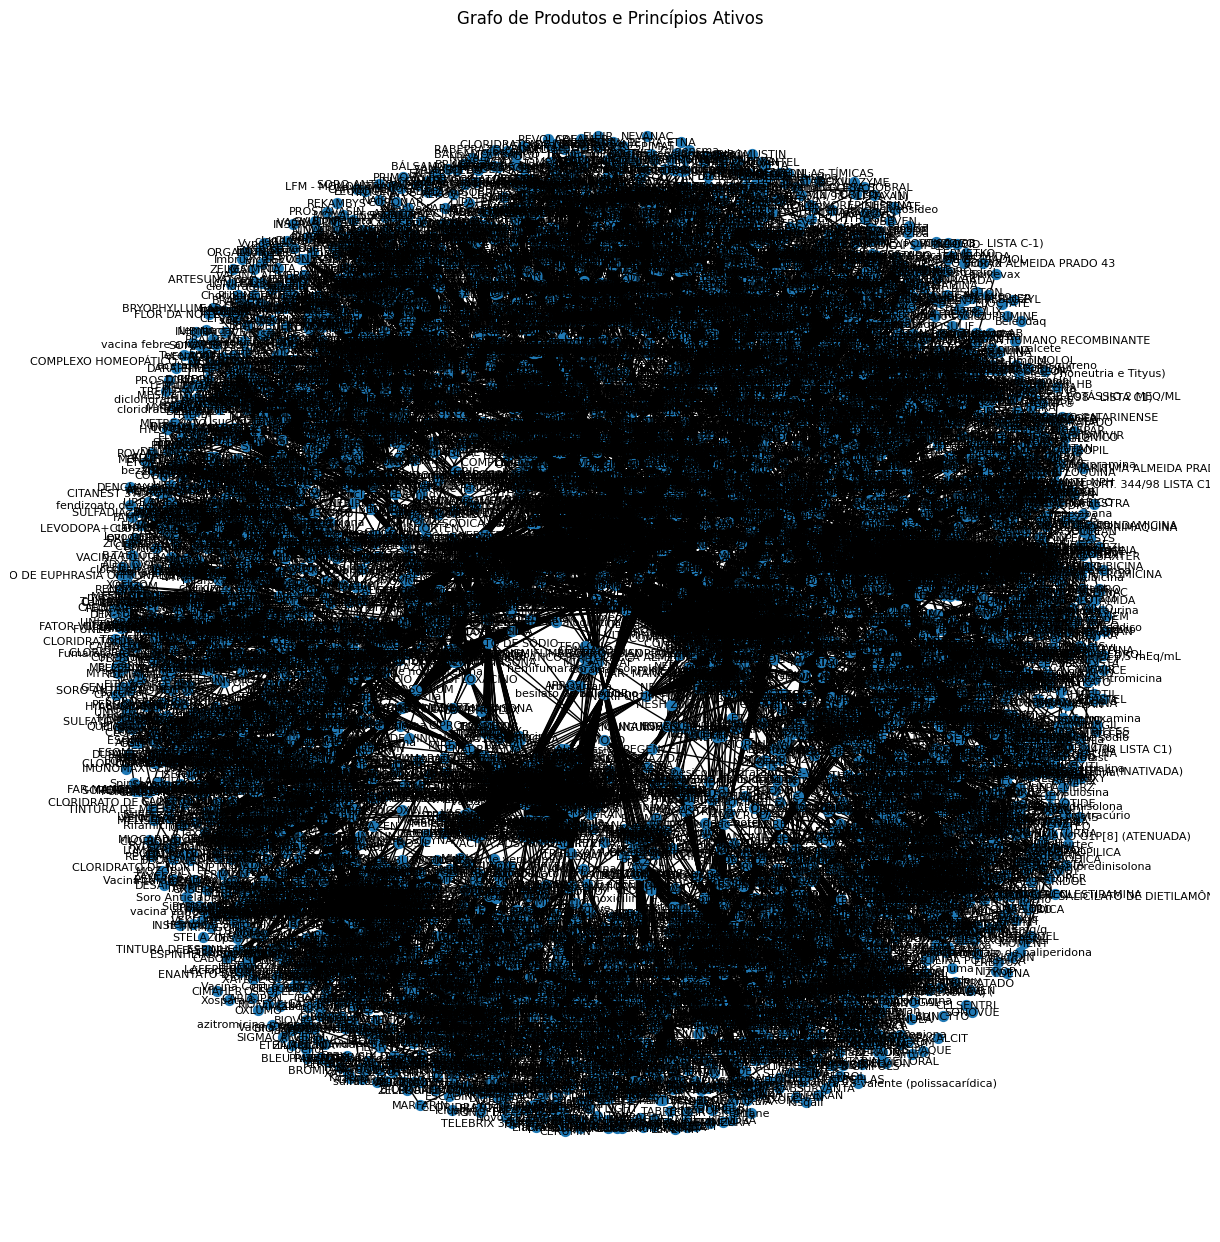

In [25]:
# Definir o layout do grafo
pos = nx.spring_layout(G, k=0.1)

# Plotar o grafo
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Grafo de Produtos e Princípios Ativos")
plt.show()

## Cálculo da assortavidade com base nas empresas

In [26]:
# Adicionar o atributo 'EMPRESA_DETENTORA_REGISTRO' aos nós do grafo
for index, row in df.iterrows():
    produto = row['NOME_PRODUTO']
    empresa = row['EMPRESA_DETENTORA_REGISTRO']
    if produto in G:
        G.nodes[produto]['empresa'] = empresa

# Calcular a assortatividade com base no atributo 'empresa'
assortatividade = nx.attribute_assortativity_coefficient(G, 'empresa')
print(f"Assortatividade com base na coluna 'EMPRESA_DETENTORA_REGISTRO': {assortatividade}")

Assortatividade com base na coluna 'EMPRESA_DETENTORA_REGISTRO': 0.023228344477062252


In [31]:
e = nx.attribute_mixing_matrix(G,'empresa')
e

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.43726484e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.43726484e-06, 0.00000000e+00, 3.80608539e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 5.43726484e-06, ...,
        0.00000000e+00, 0.00000000e+00, 9.78707671e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.26235890e-05, 0.00000000e+00],
       [0.00000000e+00, 5.43726484e-06, 3.80608539e-05, ...,
        9.78707671e-05, 0.00000000e+00, 1.70730116e-03]])

In [32]:
# Exibir a soma de todos os valores da matriz
print('Soma de todos os valores da matriz:', np.sum(e))

Soma de todos os valores da matriz: 1.0


## Cálculo da assortavidade com base na Classe Terapêutica

In [28]:
# Adicionar o atributo 'CLASSE_TERAPEUTICA' aos nós do grafo
for index, row in df.iterrows():
    produto = row['NOME_PRODUTO']
    classe_terapeutica = row['CLASSE_TERAPEUTICA']
    if produto in G:
        G.nodes[produto]['classe_terapeutica'] = classe_terapeutica

# Calcular a assortatividade com base no atributo 'classe_terapeutica'
assortatividade_classe_terapeutica = nx.attribute_assortativity_coefficient(G, 'classe_terapeutica')
print(f"Assortatividade com base na coluna 'CLASSE_TERAPEUTICA': {assortatividade_classe_terapeutica}")

Assortatividade com base na coluna 'CLASSE_TERAPEUTICA': 0.4009298512002789


In [34]:
e = nx.attribute_mixing_matrix(G,'classe_terapeutica')
e

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.38152200e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.08745297e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.39193980e-03, 5.98099132e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.98099132e-05, 6.85095370e-04]])

In [35]:
# Exibir a soma de todos os valores da matriz
print('Soma de todos os valores da matriz:', np.sum(e))

Soma de todos os valores da matriz: 1.0
